<a href="https://colab.research.google.com/github/Tristan-Brown1096/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [2]:
#importing important libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [25]:
#creating array
s = np.array([3505, 2400, 3027, 2798, 3700, 3250, 2689])

#creating mean function
def mean(a):
  return a.sum() / a.shape[0]

#using mean function
print(mean(s))

#checking mean value
print(s.mean())

#defining variance function
def variance(a):
  m = a.sum() / a.shape[0]
  b = np.array([])
  for i in a:
    b = np.append(b, (i-m) **2)
  return b.sum() / (a.shape[0] - 1)

#using variance function
print(variance(s))

#checking variance value
print(s.var(ddof=1))

#defining standard deviation function
def standev(a):
    m = a.sum() / a.shape[0]
    b = np.array([])
    for i in a:
     b = np.append(b, (i-m) **2)
    v = b.sum() / (a.shape[0] - 1)
    return v ** (1/2)

#using standard deviation function
print(standev(s))

#checking standard deviation value
s.std(ddof=1)

3052.714285714286
3052.714285714286
214387.90476190473
214387.90476190473
463.0204150595357


463.0204150595357

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [86]:
#creating customer array
c = np.array([127, 80, 105, 92, 120, 115, 93])

#creating dictionary for DataFrame
sc = {'s': s, 'c':c}

#creating DataFrame
W = pd.DataFrame(sc)

#finding covariance values for the data
W.cov()

,s,c
s,214387.904762,7604.357143
c,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [117]:
#printing the standard deviation of customers
print('The standard deviation of weekly customers is:', standev(c))

#checking customer standard deviation value
print(c.std(ddof=1))

#defining function for correlation
def ctn(a, b):
  d = {'a':a, 'b':b}
  df = pd.DataFrame(d)
  sda = standev(a)
  sdb = standev(b)
  cv = df.cov()
  sdm = sda * sdb
  c = cv / sdm
  return c['a'][1]

#using correlation function
print('The correlation coefficient is:', ctn(s, c))

#creating correlation table
W.corr()

The standard deviation of weekly customers is: 17.057326313123664
17.057326313123664
The correlation coefficient is: 0.9628339778148909


,s,c
s,1.000000,0.962834
c,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [62]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv', index_col="Unnamed: 0")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [64]:
df.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [65]:
df.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

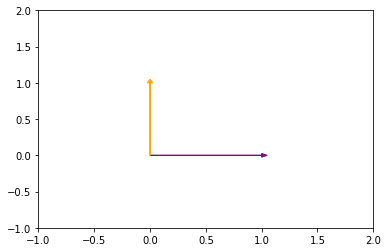

In [69]:
v1 = [1, 0]
v2 = [0, 1]

plt.arrow(0, 0, v1[0], v1[1], head_width=0.05, head_length=0.05, color='purple')
plt.arrow(0, 0, v2[0], v2[1], head_width=0.05, head_length=0.05, color='orange')
plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.show()

A synonoym for orthogonal is perpendicular

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [71]:
a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])

np.vdot(a, b)

-40

These vectors are not orthogonal, because the dot product $\neq$ 0

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [73]:
c = np.array([2, -15, 6, 20])

print(np.linalg.norm(c) ** 2)
print(np.vdot(c, c))
np.matmul(c.T, c)

665.0
665


665

All of the values are the same.

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} +  12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7 \hat{i} + 12 \hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} - 8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2 \hat{i} + 11 \hat{j} - 8 \hat{k}
\end{align}Your text here

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [77]:
f = np.array([4, 12, 11, 9, 2])

f_n = np.linalg.norm(f)

i_f = 1 / f_n

f * i_f

0.9999999999999999

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

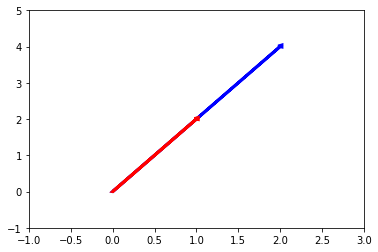

In [80]:
plt.ylim(-1, 5)
plt.xlim(-1, 3)

x=[1, 2]
w=[2, 4]

plt.arrow(0,0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, x[0], x[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.show()

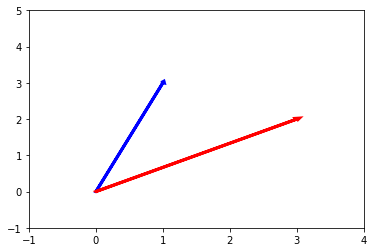

In [82]:
plt.ylim(-1, 5)
plt.xlim(-1, 4)

y=[1, 3]
z=[3, 2]

plt.arrow(0,0, y[0], y[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, z[0], z[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.show()


# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [120]:
g = np.array([1, 2])
h = np.array([2, 4])

d = {'g': g, 'h': h}

sa2 = pd.DataFrame(d)

np.linalg.matrix_rank(sa2)

1

The span of $\vec{g}$ and $\vec{h}$ is 1 dimension

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [121]:
l = np.array([1, 2, 3])
m = np.array([-1, 0, 7])
n = np.array([4, 8, 2])

d = {'l': l, 'm': m, 'n': n}

sa3 = pd.DataFrame(d)

np.linalg.matrix_rank(sa3)

3

The span of $\vec{l}$, $\vec{m}$, and $\vec{n}$ is 3 dimensions

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



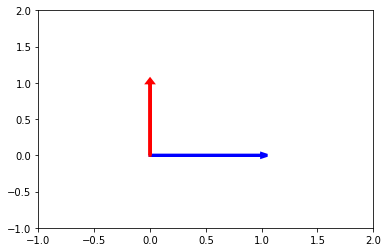

In [83]:
plt.ylim(-1, 2)
plt.xlim(-1, 2)

y=[1, 0]
z=[0, 1]

plt.arrow(0,0, y[0], y[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, z[0], z[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.show()

## 6.2 What does it mean to form a basis?

The space that any linear combination of two vectors

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [123]:
P = np.array([[1, 2, 3],
              [-1, 0, 7],
              [4, 8, 2]])

np.linalg.matrix_rank(P)

3

The rank of $P$ is 3

## 7.2 What does the rank of a matrix tell us?

Rank tells us the number of dimensions that the component vectors of a matrix span.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

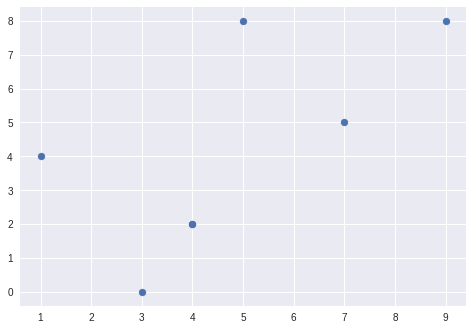

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()